# JSC270 - Class \#3

## Prof. Chevalier

### 20 Jan. 2020


# Today's Class

## Exploratory Data Analysis

## What is Exploratory Data Analysis?

# Exploratory Data Analysis

- John Tukey’s coined the term “exploratory data analysis” (EDA). 
- Data scientists agree that serious time and effort should be devoted to exploring data to sanity-check its most basic properties, and to expose unexpected features. 
- This type of "detective work" adds crucial insights to every data-driven endeavor.  


<center>
    <h3> https://jsc270.github.io/simple_page.html </h3>
</center>

In [1]:
## We start by extracting the table from the webpage, using pandas read_html

import pandas as pd

url = 'https://jsc270.github.io/simple_page.html '
df = pd.read_html(url, header=1)    # Note that the table has a header row
sets = df[1]                        # select table
columns = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
sets.columns = columns

sets

x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

## pandas.DataFrame.describe

Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [2]:
foursets = sets.astype(float)      ## we need to cast our columns to float
foursets.describe()

x1         y1         x2         y2         x3         y3  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   7.500909   9.000000   7.500909   9.000000   7.500000   
std     3.316625   2.031568   3.316625   2.031657   3.316625   2.030424   
min     4.000000   4.260000   4.000000   3.100000   4.000000   5.390000   
25%     6.500000   6.315000   6.500000   6.695000   6.500000   6.250000   
50%     9.000000   7.580000   9.000000   8.140000   9.000000   7.110000   
75%    11.500000   8.570000  11.500000   8.950000  11.500000   7.980000   
max    14.000000  10.840000  14.000000   9.260000  14.000000  12.740000   

              x4         y4  
count  11.000000  11.000000  
mean    9.000000   7.500909  
std     3.316625   2.030579  
min     8.000000   5.250000  
25%     8.000000   6.170000  
50%     8.000000   7.040000  
75%     8.000000   8.190000  
max    19.000000  12.500000

## pandas.DataFrame.set_option

Customize the behaviour of your DataFrames.

In [3]:
pd.set_option('display.precision',1)    ## Only affects the display (not the underlying data)
foursets.describe()

x1    y1    x2    y2    x3    y3    x4    y4
count  11.0  11.0  11.0  11.0  11.0  11.0  11.0  11.0
mean    9.0   7.5   9.0   7.5   9.0   7.5   9.0   7.5
std     3.3   2.0   3.3   2.0   3.3   2.0   3.3   2.0
min     4.0   4.3   4.0   3.1   4.0   5.4   8.0   5.2
25%     6.5   6.3   6.5   6.7   6.5   6.2   8.0   6.2
50%     9.0   7.6   9.0   8.1   9.0   7.1   8.0   7.0
75%    11.5   8.6  11.5   8.9  11.5   8.0   8.0   8.2
max    14.0  10.8  14.0   9.3  14.0  12.7  19.0  12.5

# Descriptive statistics


### Arithmetic mean

$$ \bar{X} = \frac{\sum_{i=1}^{n} x_i}{n} $$


### Variance 

$$ s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{X})^2}{n - 1}$$


### Standard deviation

$$ s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{X})^2}{n - 1}}$$

## Python Mathematical statistics functions

Python has built-in function for calculating mathematical statistics of numeric (Real-valued) data. See [documentation](https://docs.python.org/3/library/statistics.html).

In [4]:
# We generate a DataFrame 
# whose columns correspond to the different datasets (I, II, III, IV)
# and whose lines include: mean x, variance x, standard deviation x, mean y, variance y, standard deviation y

from statistics import *        

def stats(x, y):
    return [mean(x), variance(x), stdev(x), mean(y), variance(y), stdev(y)] 

summary = pd.DataFrame({
    "I": stats(foursets["x1"], foursets["y1"]),
    "II": stats(foursets["x2"], foursets["y2"]),
    "III": stats(foursets["x3"], foursets["y3"]),
    "IV": stats(foursets["x4"], foursets["y4"]),

    }, index = ["mean x", "var x", "std x", "mean y", "var y", "std y"])

summary

I    II   III    IV
mean x   9.0   9.0   9.0   9.0
var x   11.0  11.0  11.0  11.0
std x    3.3   3.3   3.3   3.3
mean y   7.5   7.5   7.5   7.5
var y    4.1   4.1   4.1   4.1
std y    2.0   2.0   2.0   2.0

In [5]:
#import numpy as np       ## Note: you could also use the numpy functions

def stats(x, y):
    return [x.mean(), x.var(), x.std(), y.mean(), y.var(), y.std()]

summary = pd.DataFrame({
            'I': stats(foursets["x1"], foursets["y1"]),
            'II': stats(foursets["x2"], foursets["y3"]),
            'III': stats(foursets["x3"], foursets["y3"]),
            'IV': stats(foursets["x4"], foursets["y4"]),
    }, index = ['mean x', 'variance x', 'standard deviation x', 
               'mean y', 'variance y', 'standard deviation y'])

summary

I    II   III    IV
mean x                 9.0   9.0   9.0   9.0
variance x            11.0  11.0  11.0  11.0
standard deviation x   3.3   3.3   3.3   3.3
mean y                 7.5   7.5   7.5   7.5
variance y             4.1   4.1   4.1   4.1
standard deviation y   2.0   2.0   2.0   2.0

## Visualization

What plot(s) would be relevant and interesting to display?

<center><img src="img/charts.png" width="600"></img></center>

# Plotting libraries

There are multiple libraries for plotting that you can choose from. Some of the most common ones include:

- [Matplotlib](https://matplotlib.org/) is a plotting library for Python programming (see also the command style functions of [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)) 
- [pandas](https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#api-dataframe-plotting) has built-in plotting functions
- [ggplot](https://pypi.org/project/ggplot/): if you're familiar with R's ggplot
- [seaborn](https://seaborn.pydata.org/) is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- [plotly](https://plot.ly/python/): includes interactive and specialized charts
- [altair](https://altair-viz.github.io/): declarative statistical visualization library based on Vega and Vega-Lite


# Distributions


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]),
 array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]),
 <a list of 10 Patch objects>)

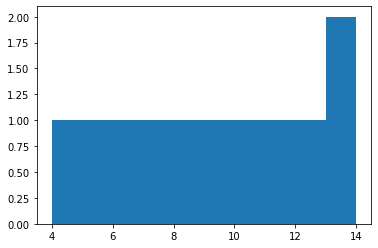

In [6]:
#### USING MATPLOTLIB
# Distribution (i.e. histogram) of the x1 variable

import matplotlib.pyplot as plt

plt.hist(foursets["x1"])

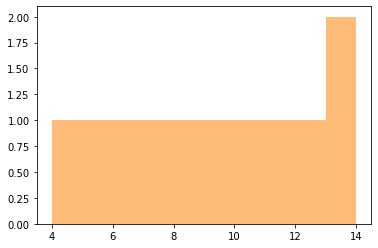

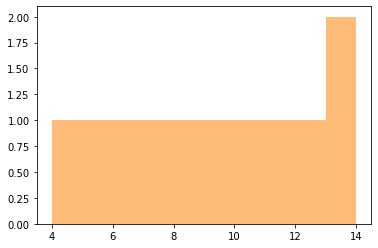

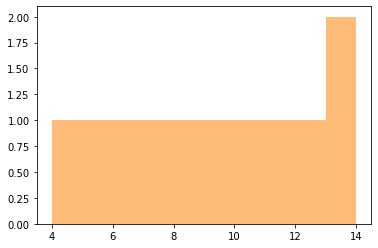

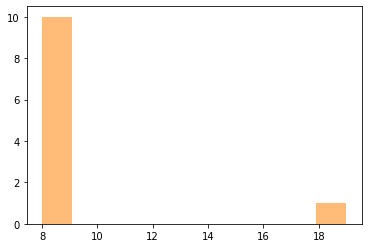

In [7]:
## Create 4 histograms, looping through every other columns of our DataFrame

fig = plt.figure()   ## this is to tell python that we want a figure containing multiple charts

for c in foursets.columns[::2]:   # [::2] = start at index 1 of the list, increment = 2
    plt.hist(x=foursets[c], alpha=0.8, color='#FFAA55')
    plt.show()       ## this plots the chart, and clear the "plot cache"

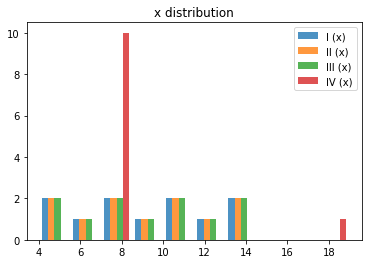

In [8]:
## Plotting multiple distributions in one graph

import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(x=[foursets.x1, foursets.x2, foursets.x3, foursets.x4], 
         ## more elegant code is: x=foursets[foursets.columns[::2]],
         alpha=0.8,
         label=["I (x)", "II (x)", "III (x)", "IV (x)"])
plt.title("x distribution")
plt.legend(loc=1)
plt.show()

In [9]:
### USING PLOTLY

import plotly.express as px

for c in foursets.columns[1::2]:
    fig = px.histogram(foursets, x=c)
    fig.show()

## Boxplots

### Anatomy of a boxplot

<img src="img/boxplot-anatomy.png" width="800"></img>

## pandas.DataFrame.boxplot

Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns.

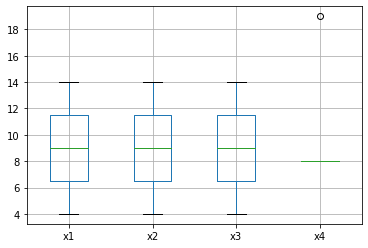

In [10]:
## Compare the boxplots for x values
foursets[foursets.columns[::2]].boxplot()

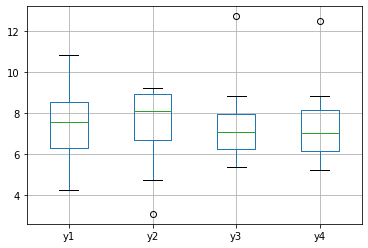

In [11]:
# Compare the boxplots for y values
foursets[foursets.columns[1::2]].boxplot()

# Using Matplotlib

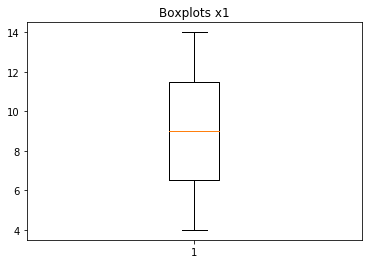

In [12]:
# A single boxplot

import matplotlib.pyplot as plt

plt.figure()                     ## Create the main figure (optional when there's only one plot)
plt.title('Boxplots x1')         ## Add a title to the (unique) plot in the figure
plt.boxplot(foursets.x1)         ## Create the boxplot
plt.show()                       ## Show the result (optional)

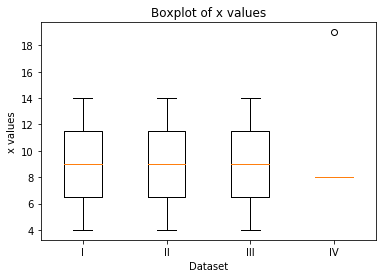

In [13]:
# Multiple boxplots side-by-side

import matplotlib.pyplot as plt

fig = plt.figure()

all_x = [foursets.x1, foursets.x2, foursets.x3, foursets.x4]
names = ['I', 'II', 'III', 'IV']
plt.boxplot(all_x)
plt.xticks([1, 2, 3, 4], names)      ## Replace x ticks with dataset names
plt.xlabel('Dataset')                ## Label the x axis
plt.ylabel('x values')               ## Label the y axis
plt.title('Boxplot of x values')

plt.show()

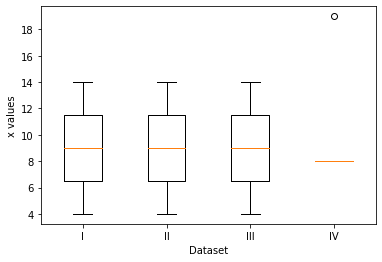

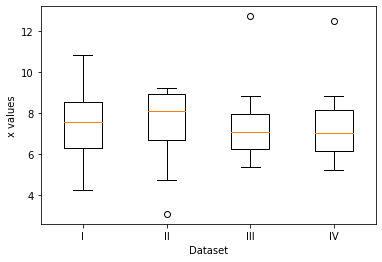

In [14]:
fig = plt.figure()

all_x = [foursets.x1, foursets.x2, foursets.x3, foursets.x4]
setname = ['I', 'II', 'III', 'IV']
plt.boxplot(all_x)
plt.xticks([1, 2, 3, 4], setname)
plt.xlabel('Dataset')
plt.ylabel('x values')
plt.show()

all_y = [foursets.y1, foursets.y2, foursets.y3, foursets.y4]
setname = ['I', 'II', 'III', 'IV']
plt.boxplot(all_y)
plt.xticks([1, 2, 3, 4], setname)
plt.xlabel('Dataset')
plt.ylabel('x values')
plt.show()

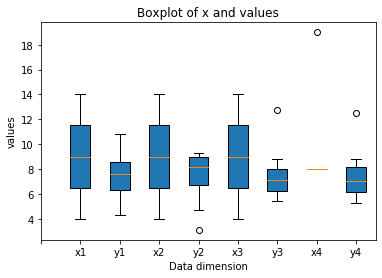

In [15]:
# Multiple boxplots side-by-side
import numpy as np
fig = plt.figure()

all_x = [foursets.x1, foursets.x2, foursets.x3, foursets.x4]
all_y = [foursets.y1, foursets.y2, foursets.y3, foursets.y4]
setname = ['I', 'II', 'III', 'IV']
bp_x = plt.boxplot(all_x, positions=[1,3,5,7], patch_artist=True)
bp_y = plt.boxplot(all_y, positions=[2,4,6,8], patch_artist=True)


## Add information to the plot
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])    ## Replace x ticks with dataset names
plt.xlabel('Data dimension')       ## Label the x axis
plt.ylabel('values')               ## Label the y axis
plt.title('Boxplot of x and values')

plt.show()

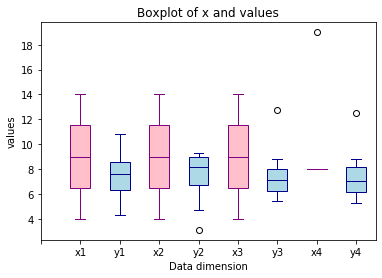

In [16]:
# Multiple boxplots side-by-side / IMPROVED
import numpy as np
fig = plt.figure()

all_x = [foursets.x1, foursets.x2, foursets.x3, foursets.x4]
all_y = [foursets.y1, foursets.y2, foursets.y3, foursets.y4]
setname = ['I', 'II', 'III', 'IV']
bp_x = plt.boxplot(all_x, positions=[1,3,5,7], patch_artist=True)
bp_y = plt.boxplot(all_y, positions=[2,4,6,8], patch_artist=True)

## Change the colors
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp_x[element], color='purple')
    plt.setp(bp_y[element], color='darkblue')
    
for patch in bp_x['boxes']:
    patch.set(facecolor='pink')
    
for patch in bp_y['boxes']:
    patch.set(facecolor='lightblue')

## Add information to the plot
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])    ## Replace x ticks with dataset names
plt.xlabel('Data dimension')       ## Label the x axis
plt.ylabel('values')               ## Label the y axis
plt.title('Boxplot of x and values')

plt.show()

In [17]:
## Calculating the median manually
print(foursets[foursets.columns[::2]].median())
print(foursets[foursets.columns[1::2]].median())

x1    9.0
x2    9.0
x3    9.0
x4    8.0
dtype: float64
y1    7.6
y2    8.1
y3    7.1
y4    7.0
dtype: float64


# Outliers

In [18]:
## Checking manually for outliers

values = foursets.x1

Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
print("Outliers below min:", any(values < min), 
      "\nOutliers above max:", any(values > max))

Outliers below min: False 
Outliers above max: False


## Mean vs. median vs. mode

In [19]:
import seaborn as sns
movies = pd.read_csv("data/50movies-clean.csv")
movies.head()

Unnamed: 0  box_office                                            genre  \
0           0         NaN                           Drama Mystery Thriller   
1           1         NaN  Animation Action Adventure Comedy Family Sci-Fi   
2           2         NaN                          Biography Drama History   
3           3         NaN                              Drama Music Romance   
4           4         NaN                                            Drama   

   imdb_rating  imdb_votes                              title  metascore  \
0          7.1     21534.0                     First Reformed       85.0   
1          8.7     43599.0  Spider-Man: Into the Spider-Verse       87.0   
2          7.5     66076.0                          First Man       84.0   
3          8.1    118052.0                     A Star Is Born       88.0   
4          8.2     30951.0                               Roma       96.0   

   year                            language           country  
0  2017                             English  USA UK Australia  
1  2018                     English Spanish               USA  
2  2018                             English         USA Japan  
3  2018                             English               USA  
4  2018  Spanish English Norwegian Japanese        Mexico USA

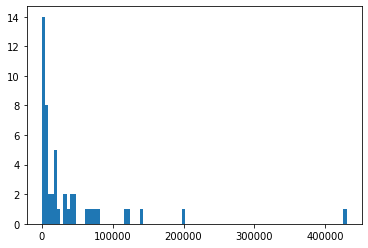

In [20]:
votes = movies['imdb_votes'].astype(float).dropna()

fig = plt.figure()
plt.hist(votes, bins=100)    ## change the values for the bin, and observe the difference
plt.show()

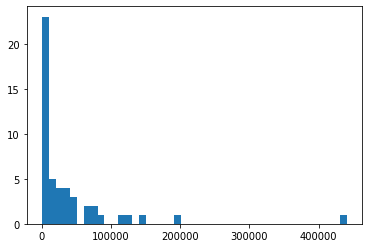

In [21]:
import math
votes = movies['imdb_votes'].astype(float).dropna()
min = math.floor(votes.min())
max = math.ceil(votes.max())
binwidth = 10000

fig = plt.figure()
plt.hist(votes, bins=range(min, max + binwidth, binwidth))
plt.show()

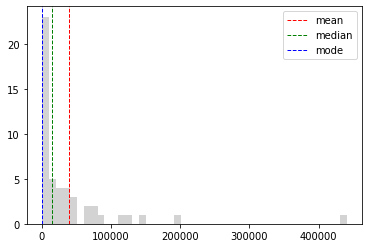

In [22]:
## Plot the frequency distribution, mean, median and mode
from scipy import stats

fig = plt.figure()
plt.hist(votes, color='lightgray', bins=range(min, max + binwidth, binwidth))

## Add vertical lines to idicate the mean, median and mode values:
plt.axvline(votes.mean(), 
            linewidth=1, color='red', linestyle='--', label = "mean") 
plt.axvline(votes.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
plt.axvline(stats.mode(votes).mode[0], 
            linewidth=1, color='blue', linestyle='--', label = "mode")

## Adding the legend:
plt.legend(loc='upper right')
plt.show()

## Simple scatterplot

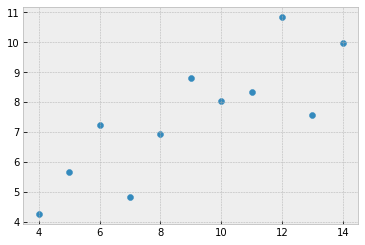

In [23]:
plt.style.use('bmh')

plt.figure()
plt.scatter(foursets.x1, foursets.y1)
plt.show()

Styles: [https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

<img src="img/styles.png" width="600"></img>

## Title, labels


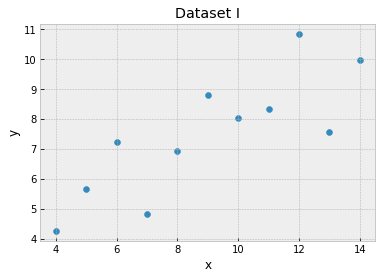

In [24]:
plt.title('Dataset I')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(foursets.x1, foursets.y1)
plt.show()

## Markers

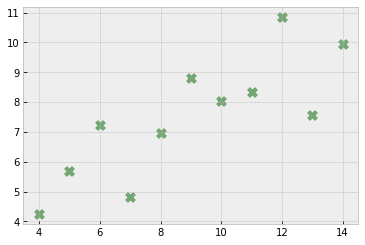

In [25]:
plt.scatter(foursets.x1, foursets.y1, 
            s=100,            # size of individual visual marks, in points 
            marker="X",       # style of the marker
            c="darkgreen",    # color of the mark
            alpha=0.5)        # opacity (0=transparent, 1=opaque)
plt.show()

## Multiple plots (superimposed)

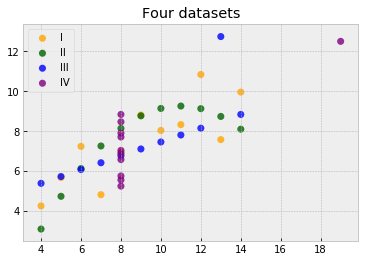

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)       # nrow, ncolumn, index 

ax.scatter(foursets.x1, foursets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50, label="I")
ax.scatter(foursets.x2, foursets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50, label="II")
ax.scatter(foursets.x3, foursets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50, label="III")
ax.scatter(foursets.x4, foursets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50, label="IV")

 
plt.title('Four datasets')     # set title for the figure
plt.legend(loc=2)                    # specify the location of the legend 
plt.show()

## Multiple plots (side-by-side)

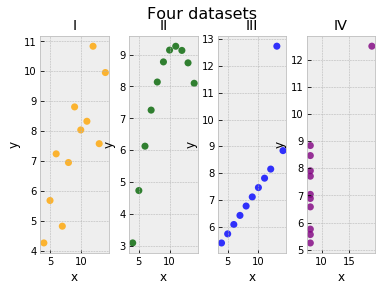

In [27]:
fig = plt.figure()
fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

ax1 = fig.add_subplot(1, 4, 1)       
ax1.scatter(foursets.x1, foursets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(1, 4, 2)
ax2.scatter(foursets.x2, foursets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(1, 4, 3)
ax3.scatter(foursets.x3, foursets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(1, 4, 4)
ax4.scatter(foursets.x4, foursets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

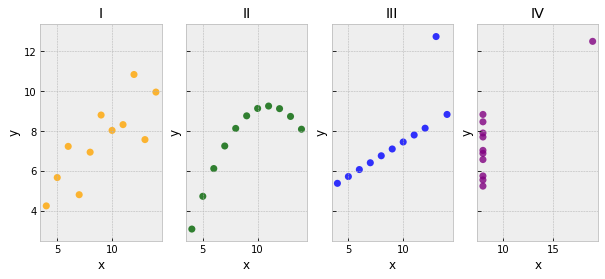

In [28]:
## A more concise version:
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

def addScatter(x, y, setname, color, index):
    axs[index].scatter(x,y,alpha=0.8, c=color, edgecolors='none', s=50)
    axs[index].set_xlabel("x")
    axs[index].set_ylabel("y")
    axs[index].set_title(setname)

addScatter(foursets.x1, foursets.y1, "I", "orange",0)
addScatter(foursets.x2, foursets.y2, "II", "darkgreen",1)
addScatter(foursets.x3, foursets.y3, "III", "blue",2)
addScatter(foursets.x4, foursets.y4, "IV", "purple",3)

## Multiple plots (juxtaposed in a grid)

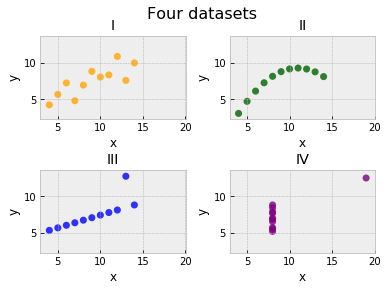

In [29]:
# Multiple plots separated with shared axes

fig = plt.figure()
fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)       ## add space between plots

ax1 = fig.add_subplot(2, 2, 1)       
ax1.scatter(foursets.x1, foursets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax2.scatter(foursets.x2, foursets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(2, 2, 3, sharex = ax1, sharey = ax1)
ax3.scatter(foursets.x3, foursets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(2, 2, 4,  sharex = ax1, sharey = ax1)
ax4.scatter(foursets.x4, foursets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

## Importance of layout and axis consistency

<table>
    <tr>
        <td><img src="img/anscombe2.png" width="400"></img></td>
        <td><img src="img/anscombe3.png" width="400"></img></td>
        <td><img src="img/anscombe1.png" width="400"></img></td>
    </tr>
</table>

## Anscombe's quartet

<img src="img/anscombe_wikipedia.png" width="800"></img>

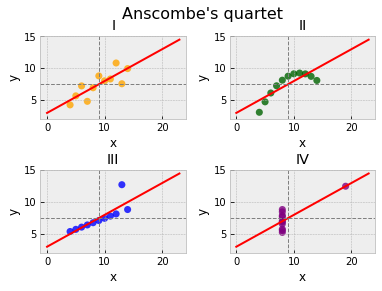

In [30]:
from scipy import stats
import numpy as np

fig = plt.figure()
fig.suptitle("Anscombe's quartet", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)       
ax1.scatter(foursets.x1, foursets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(foursets.x1,foursets.y1)
xi = np.arange(24)
line = slope*xi+intercept
plt.plot(xi, line, 'r', label='fitted line')


ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax2.scatter(foursets.x2, foursets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(foursets.x2,foursets.y2)
xi = np.arange(24)
line = slope*xi+intercept
plt.plot(xi, line, 'r', label='fitted line')

ax3 = fig.add_subplot(2, 2, 3, sharex = ax1, sharey = ax1)
ax3.scatter(foursets.x3, foursets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(foursets.x3,foursets.y3)
xi = np.arange(24)
line = slope*xi+intercept
plt.plot(xi, line, 'r', label='fitted line')



ax4 = fig.add_subplot(2, 2, 4,  sharex = ax1, sharey = ax1)
ax4.scatter(foursets.x4, foursets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(foursets.x4,foursets.y4)
xi = np.arange(24)
line = slope*xi+intercept
plt.plot(xi, line, 'r', label='fitted line')

## Adding the mean

ax1.axvline(x=foursets.x1.mean(), linewidth=1, color='gray', linestyle='--') 
ax1.axhline(y=foursets.y1.mean(), linewidth=1, color='gray', linestyle='--') 
ax2.axvline(x=foursets.x2.mean(), linewidth=1, color='gray', linestyle='--') 
ax2.axhline(y=foursets.y2.mean(), linewidth=1, color='gray', linestyle='--') 
ax3.axvline(x=foursets.x3.mean(), linewidth=1, color='gray', linestyle='--') 
ax3.axhline(y=foursets.y3.mean(), linewidth=1, color='gray', linestyle='--') 
ax4.axvline(x=foursets.x4.mean(), linewidth=1, color='gray', linestyle='--') 
ax4.axhline(y=foursets.y4.mean(), linewidth=1, color='gray', linestyle='--') 


#ax1.axline(line)


plt.show()

## Anscombe's quartet and seaborn

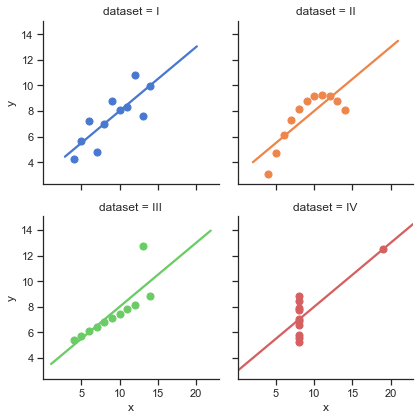

In [31]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=3,
           scatter_kws={"s": 50, "alpha": 1})

## Datasaurus dozen

<img src="img/datasaurus.png" width=600></img>

## Statistical summaries and visualization

<img src="img/boxplots.gif"></img>

## Statistical summaries and visualization

<img src="img/BoxViolinSmaller.gif"></img>

## Homework

The datasaurus dozen dataset can be found [here](https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip)

* Create a summary statistic table with the different dataset properties
* Visualize the different datasets as a scatterplot

## Ordinal data

In [32]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171   7.2   NaN        S  
1      0          PC 17599  71.3   C85        C  
2      0  STON/O2. 3101282   7.9   NaN        S  
3      0            113803  53.1  C123        S  
4      0            373450   8.1   NaN        S

Note:
* Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
* Pclass: 1 = Upper, 2 = Middle, 3 = Lower
* Survived: 0 = No, 1 = Yes
* SibSup: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic 

## Question: What is the age distribution per class?

<Figure size 432x288 with 0 Axes>

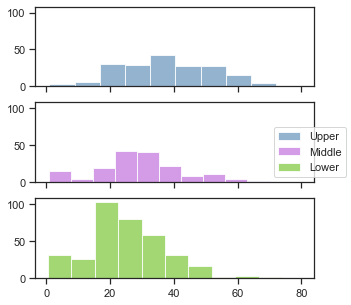

In [33]:
plt.figure()

upper = titanic.loc[titanic['Pclass'] == 1]
middle = titanic.loc[titanic['Pclass'] == 2]
lower = titanic.loc[titanic['Pclass'] == 3]

colors=["#7aa0c4","#ca82e1" ,"#8bcd50"]

fig, axs = plt.subplots(3, 1, figsize=(5, 5), sharey=True, sharex=True)

axs[0].hist(x=upper['Age'].dropna(), alpha=0.8, color=colors[0], label="Upper")
axs[1].hist(x=middle['Age'].dropna(), alpha=0.8, color=colors[1], label="Middle")
axs[2].hist(x=lower['Age'].dropna(), alpha=0.8,  color=colors[2], label="Lower")

fig.legend(loc=7)
plt.show()

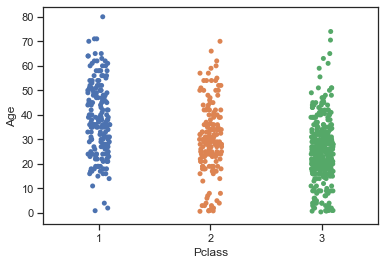

In [34]:
## Swarm plots

sns.stripplot(x="Pclass", y="Age", data=titanic, jitter=True)
ax.set_xlabel("Class")
ax.set_ylabel("Age")
plt.show()

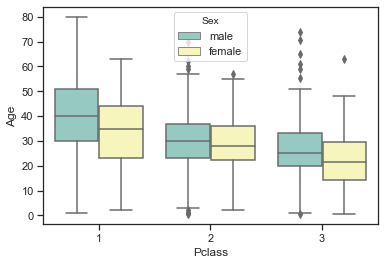

In [35]:
ax = sns.boxplot(x="Pclass", y="Age", hue="Sex",
                 data=titanic, palette="Set3")

## Categorical data

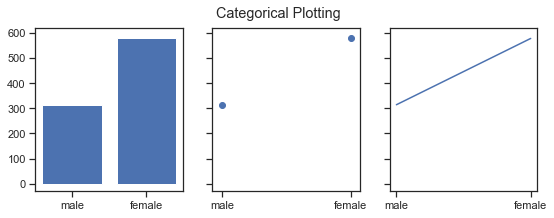

In [36]:
names = titanic['Sex'].unique()
values = titanic['Sex'].groupby(titanic['Sex']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

### Exercise: Are these visualizations appropriate?


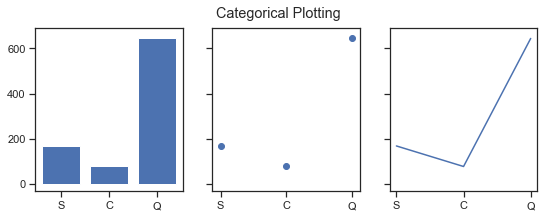

In [37]:
names = titanic['Embarked'].dropna().unique()
values = titanic['Embarked'].dropna().groupby(titanic['Embarked']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

## Question: What is the survival probability by class and gender?

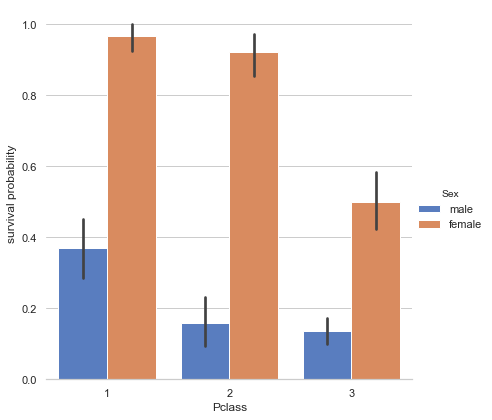

In [38]:
import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")


# Today's Class

## Exploratory Data Analysis



- Descriptive statistics:
    - mean, median, mode
    - variance, standard deviation
    - frequency distributions
    - linear regression
    - outliers

- Data visualization:
   - visual summary
   - distributions
   - relationships